# Loading dataset

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [ ]:
train_set, test_set = load_titanic_data()

# Vizualizing the dataset

In [84]:
test_set.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_set = train_set.set_index("PassengerId")
test_set = test_set.set_index("PassengerId")

In [ ]:
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_set[train_set["Sex"]=="male"]["Age"].median()
#train_set[train_set["Sex"]=="female"]["Age"].median()

29.0

In [ ]:
train_set.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_set["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train_set["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
train_set["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [37]:
temp_df = train_set.copy()

temp_df.drop(columns='Name')

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,female,19.0,0,0,112053,30.0000,B42,S
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


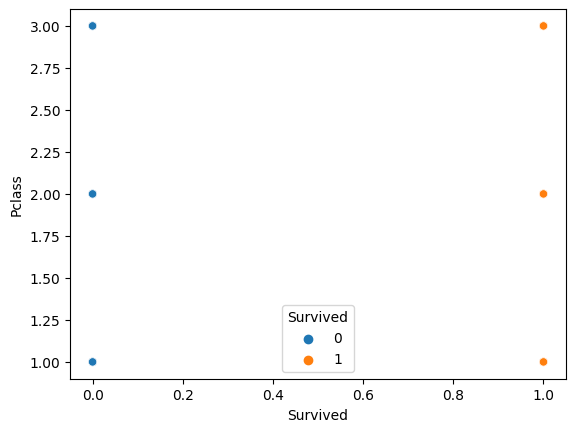

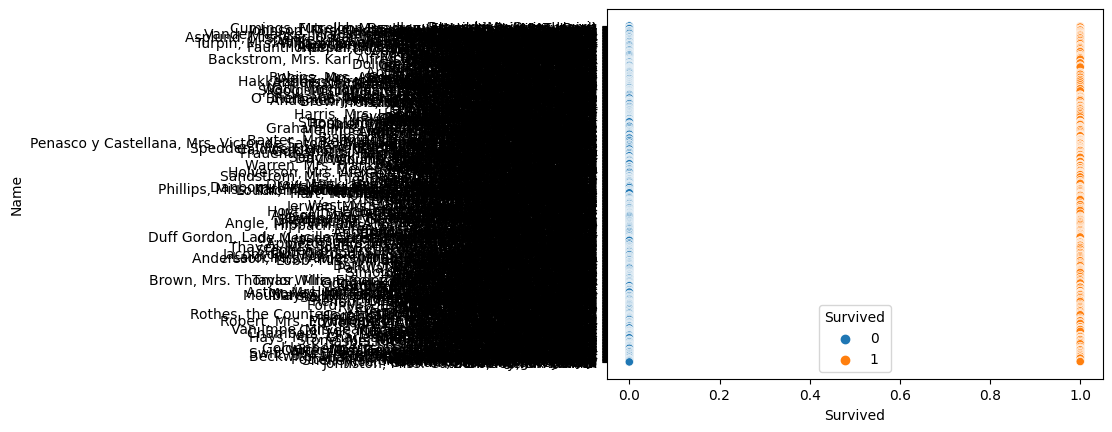

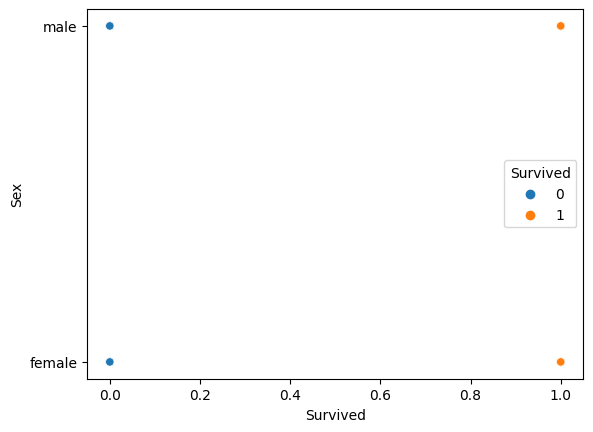

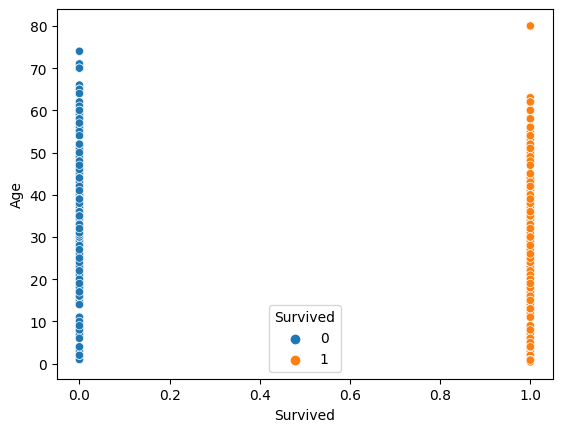

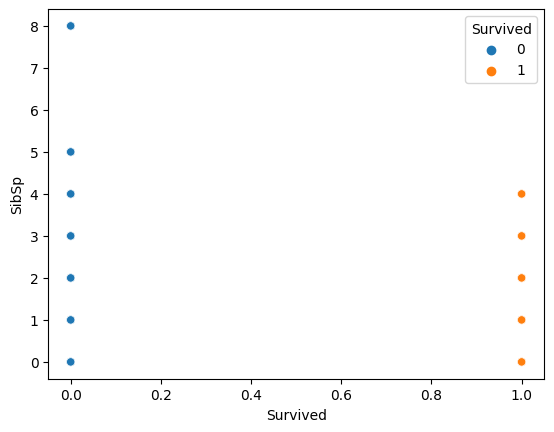

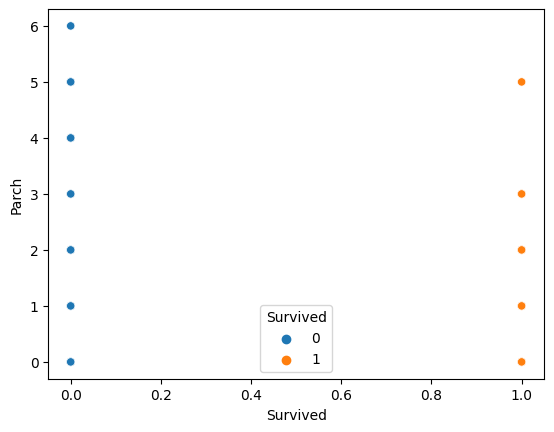

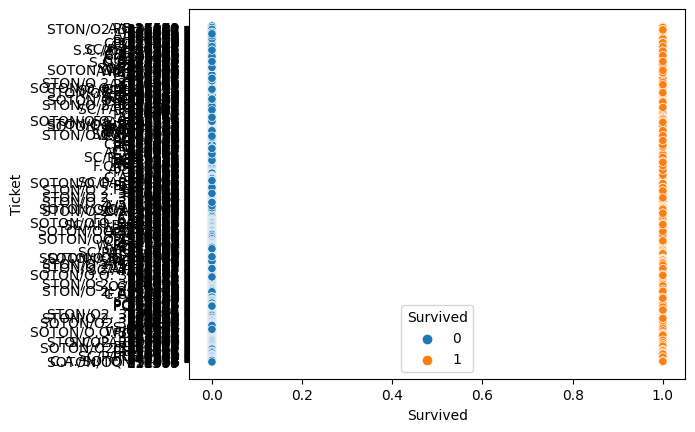

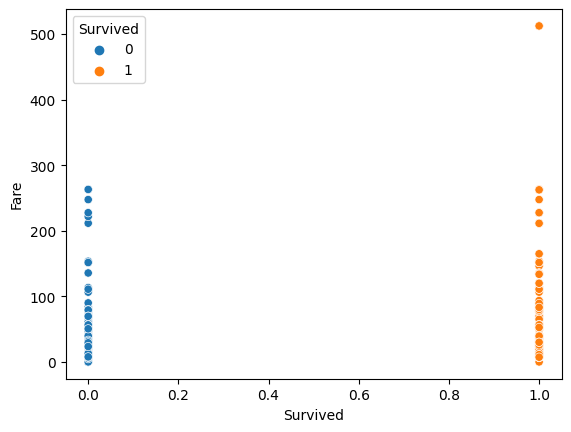

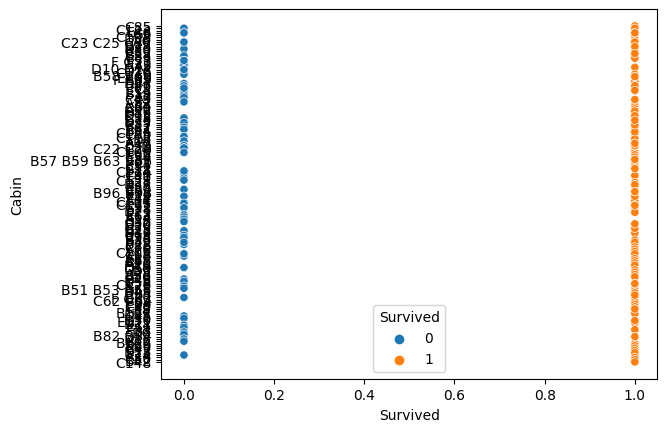

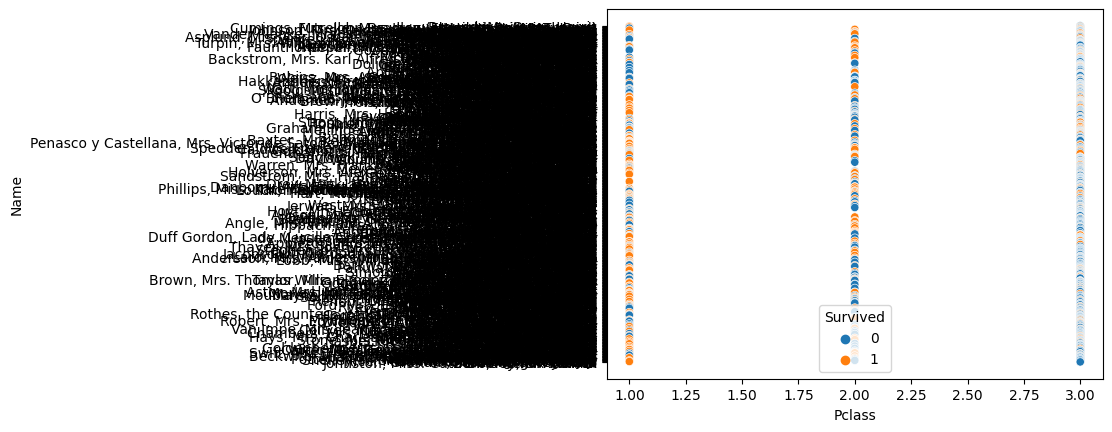

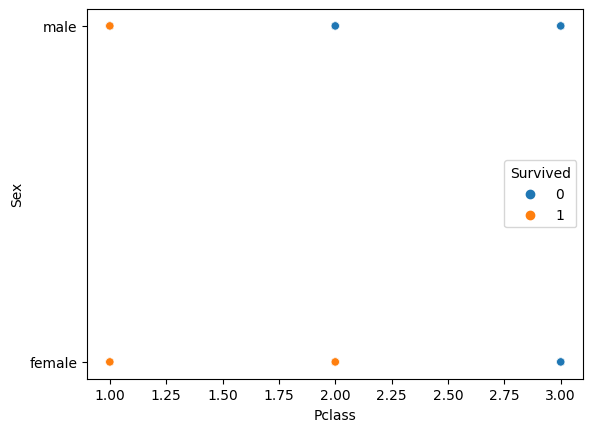

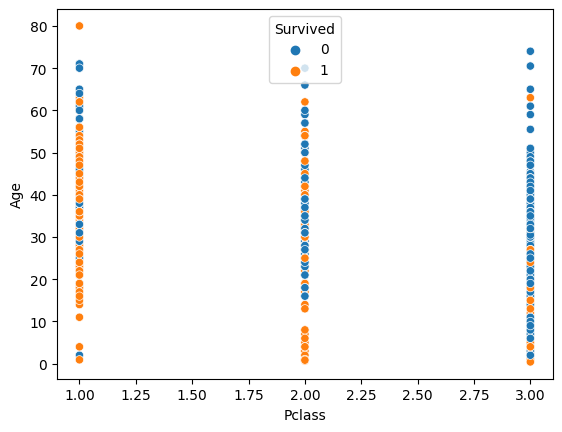

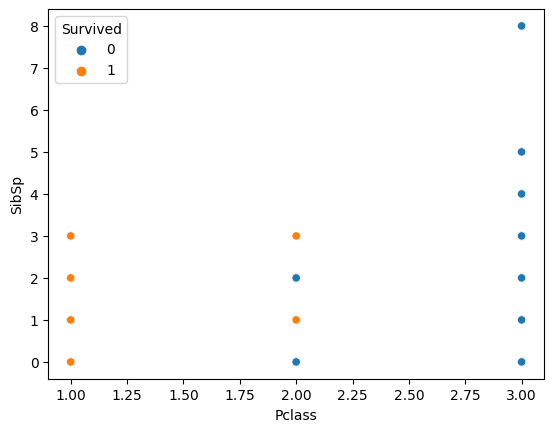

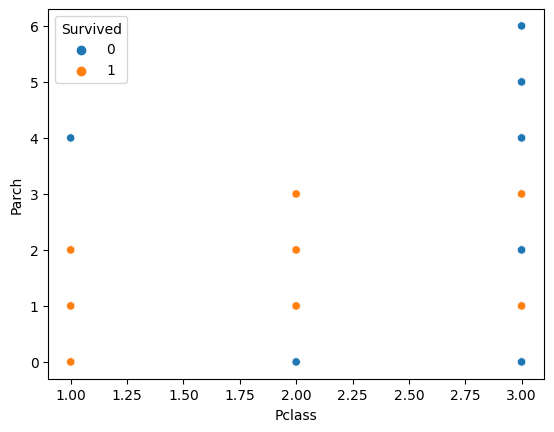

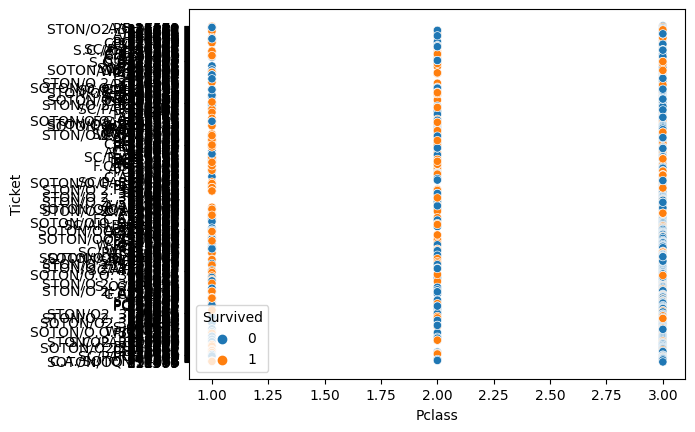

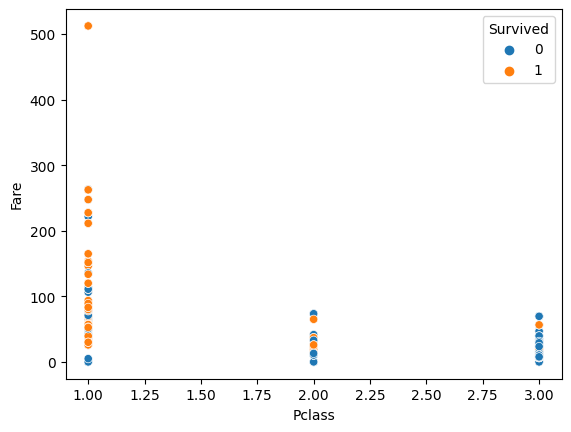

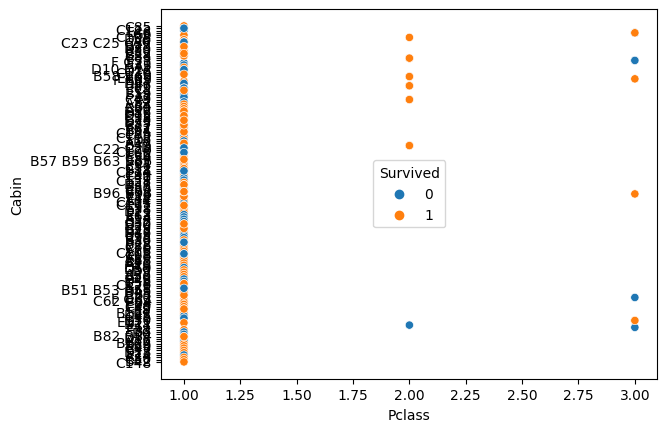

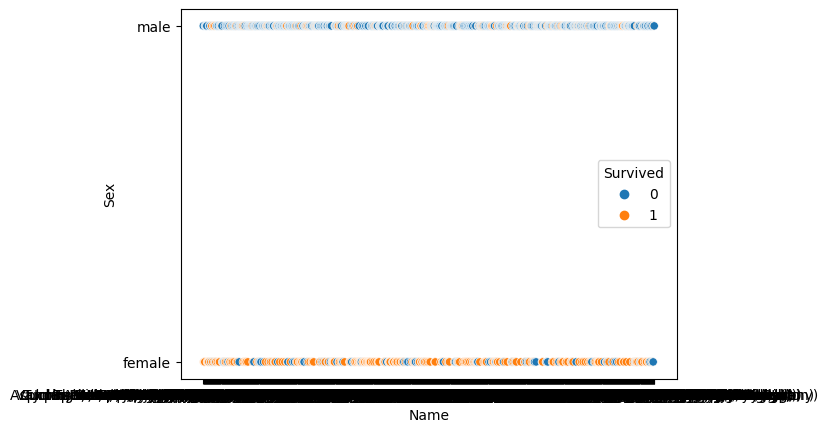

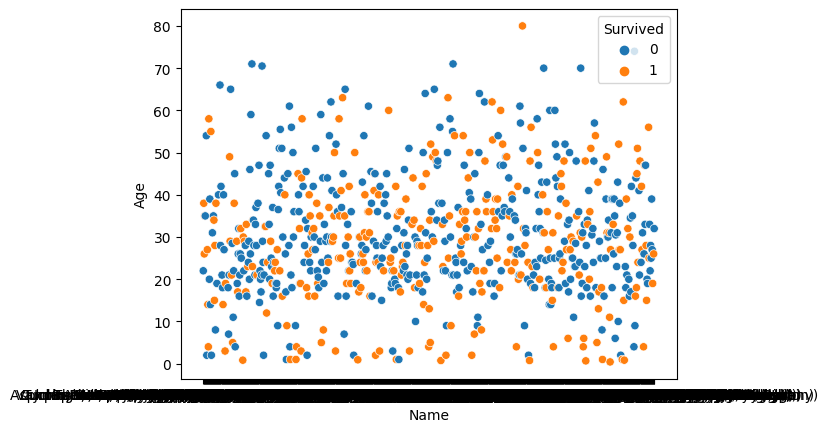

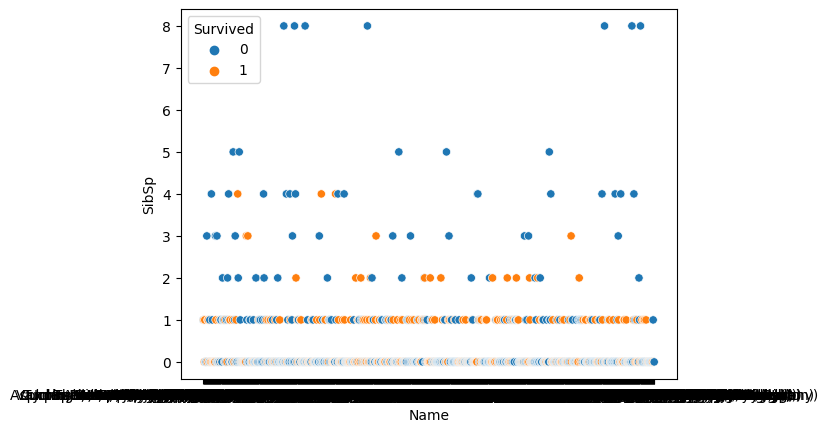

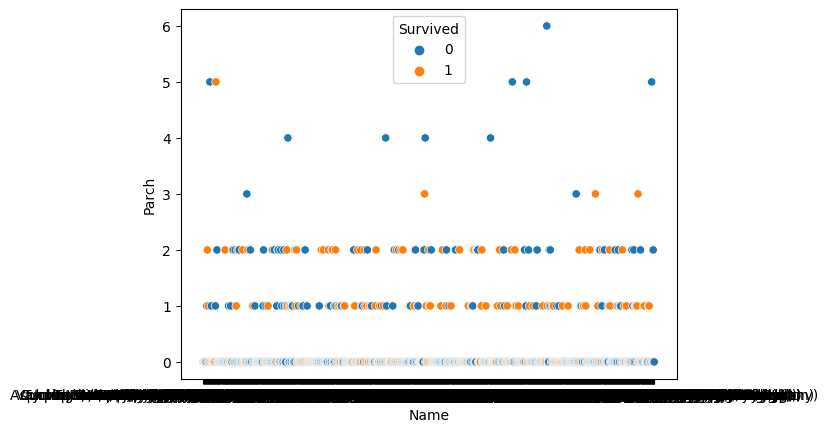

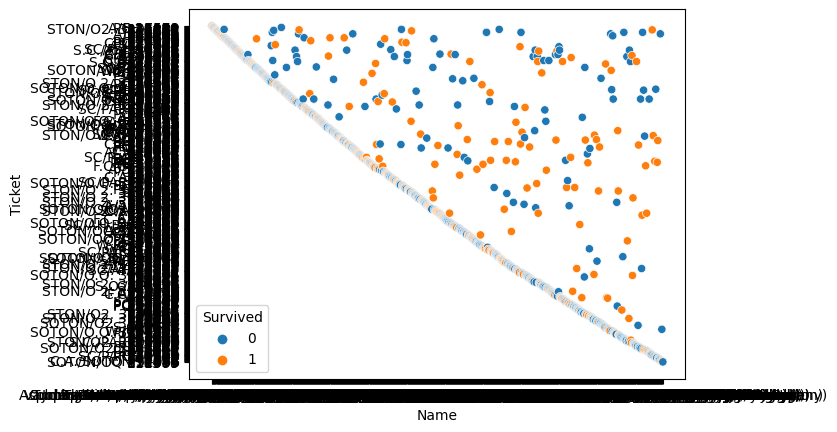

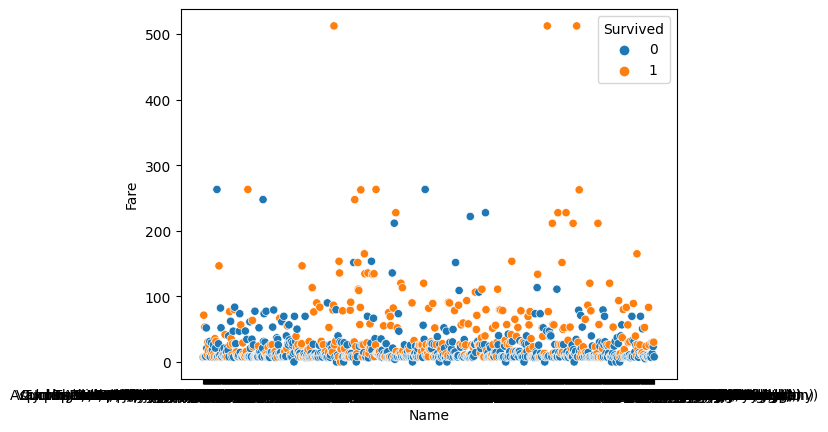

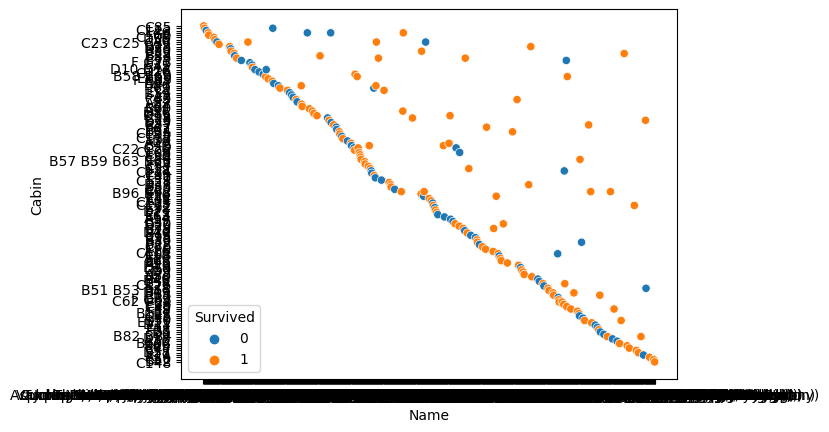

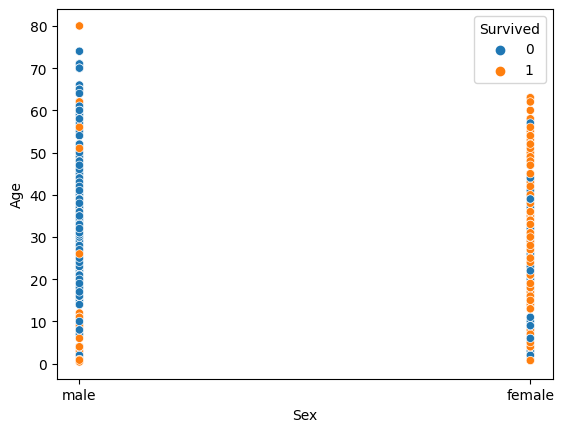

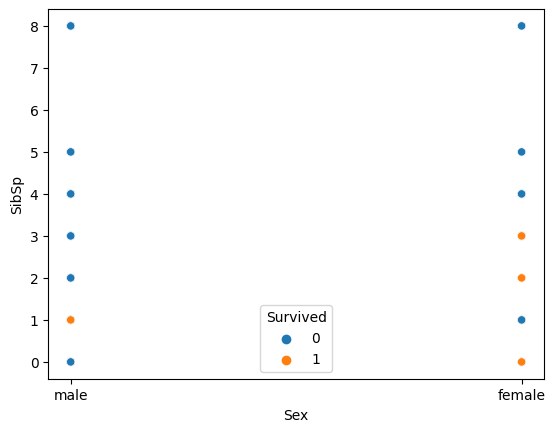

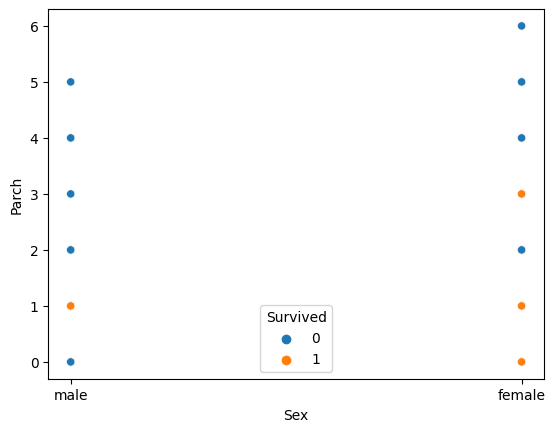

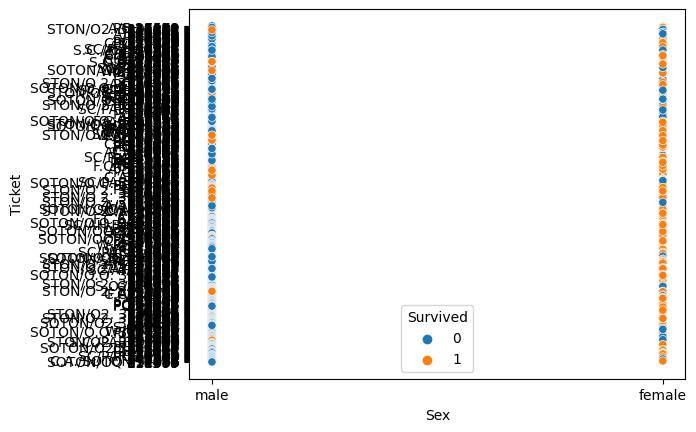

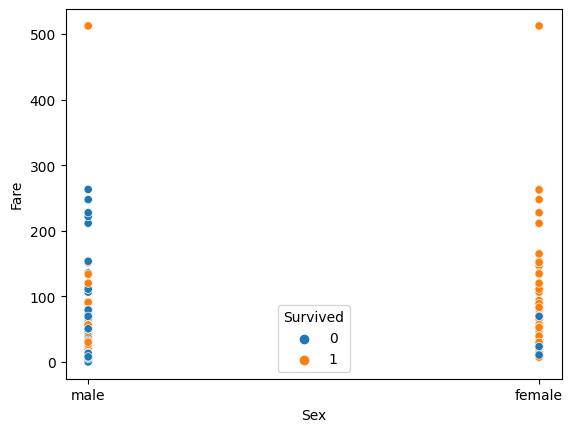

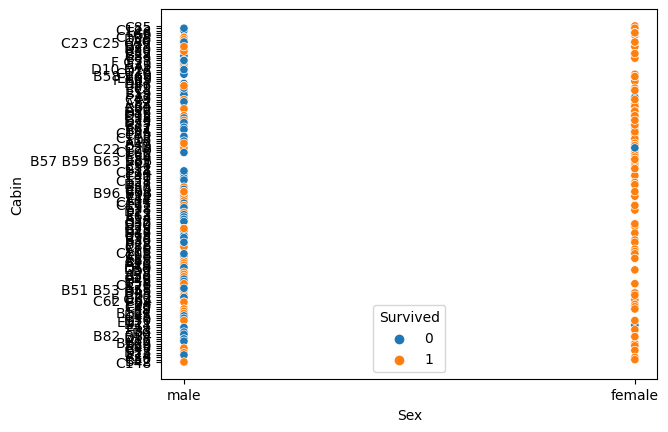

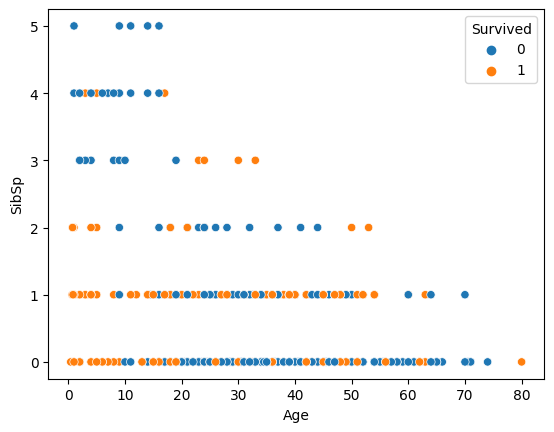

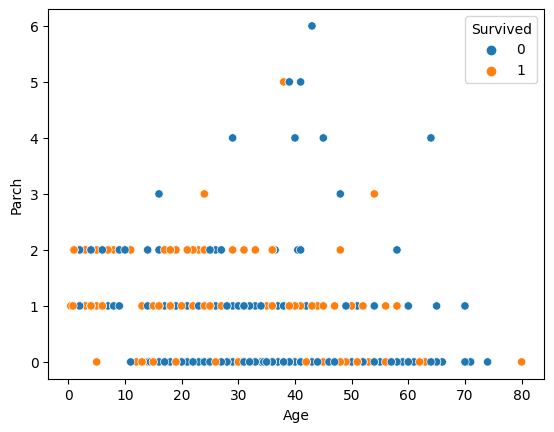

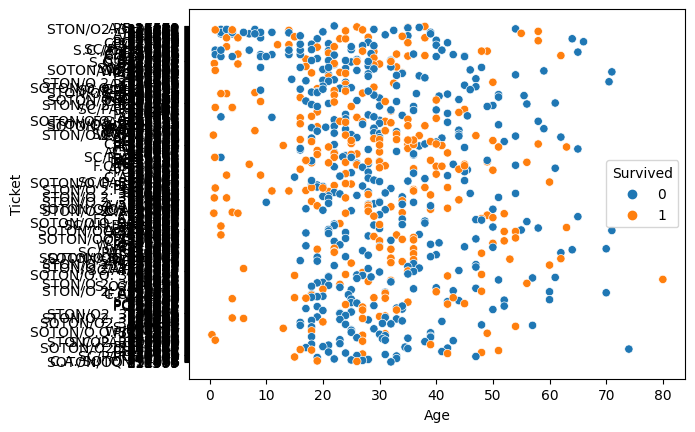

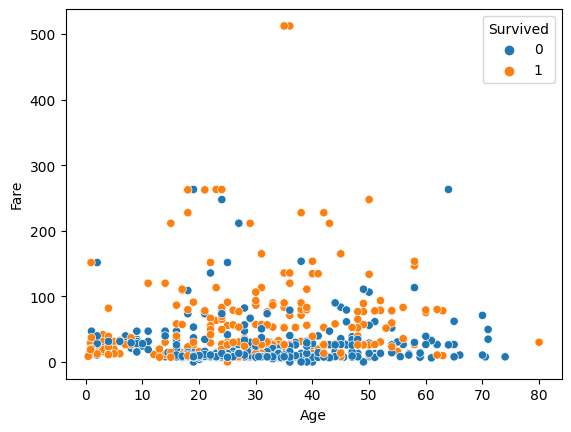

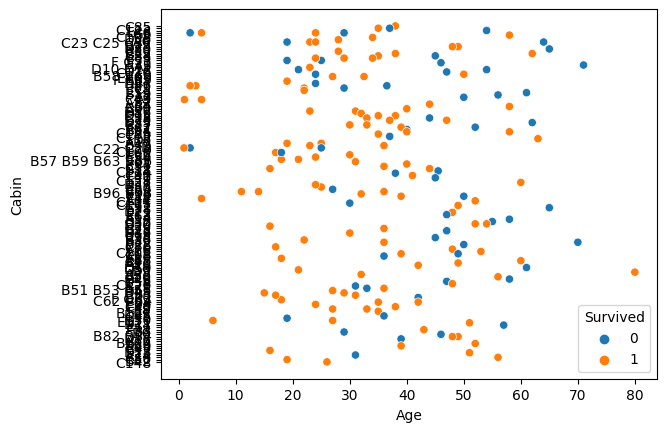

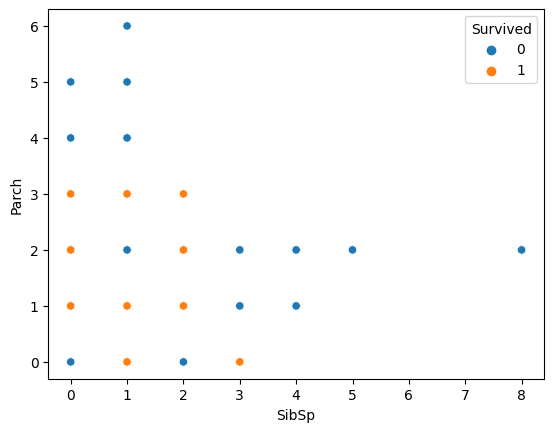

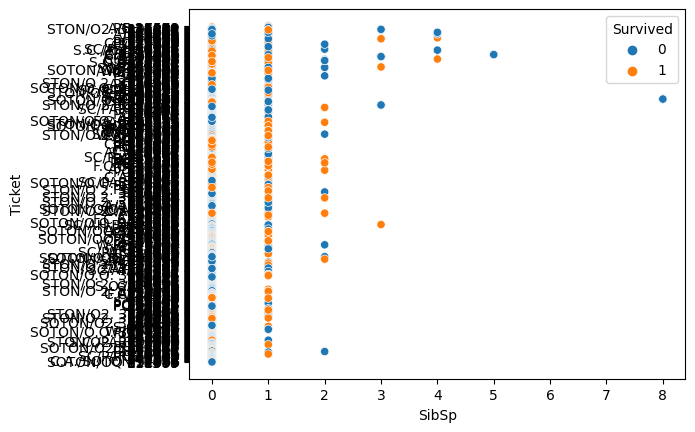

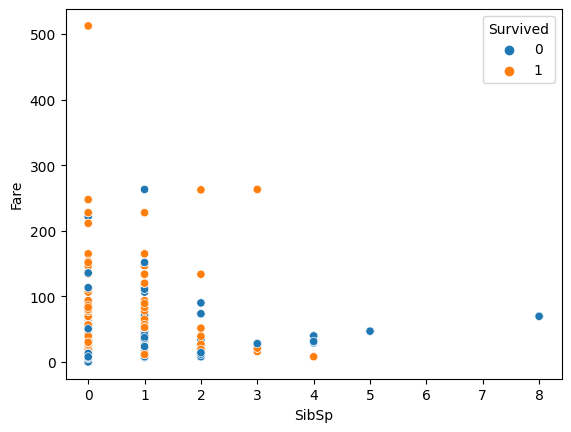

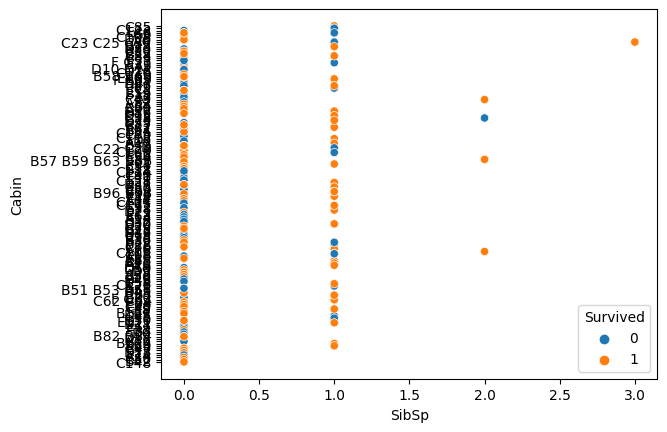

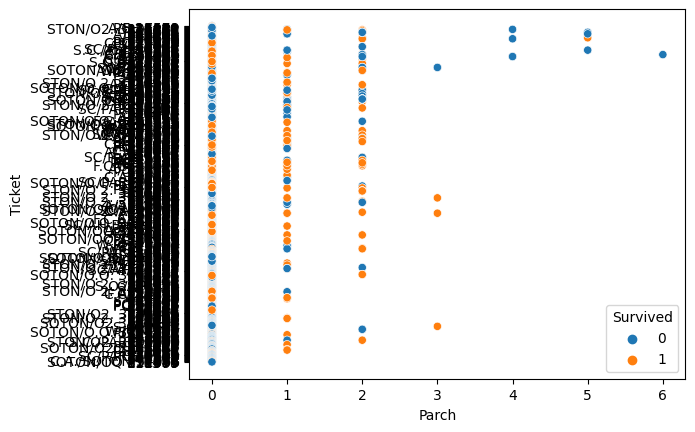

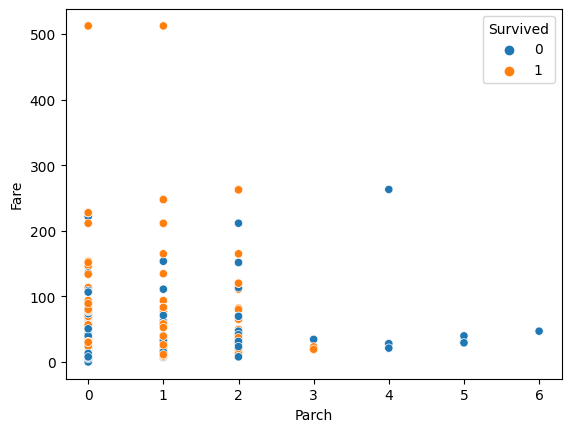

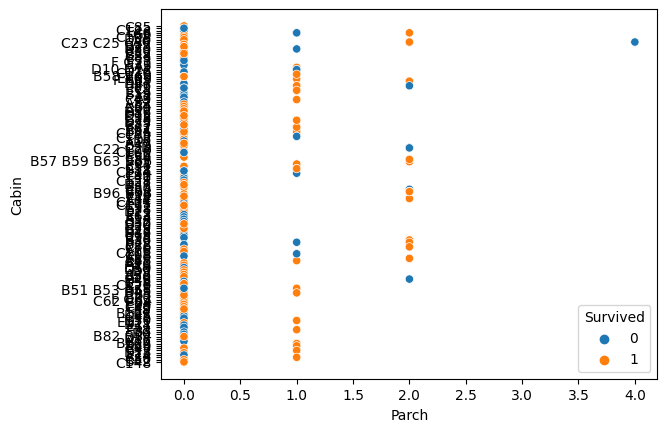

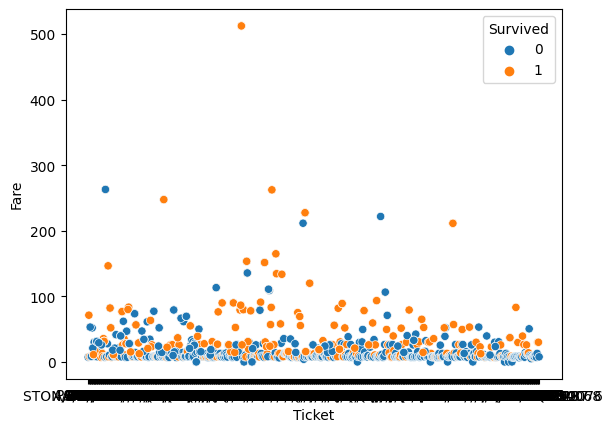

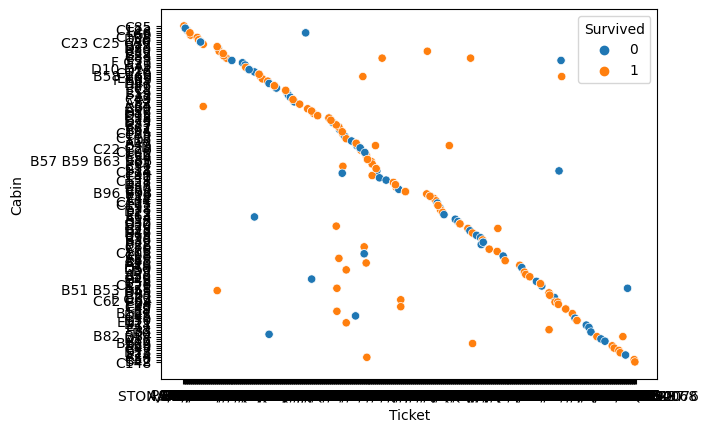

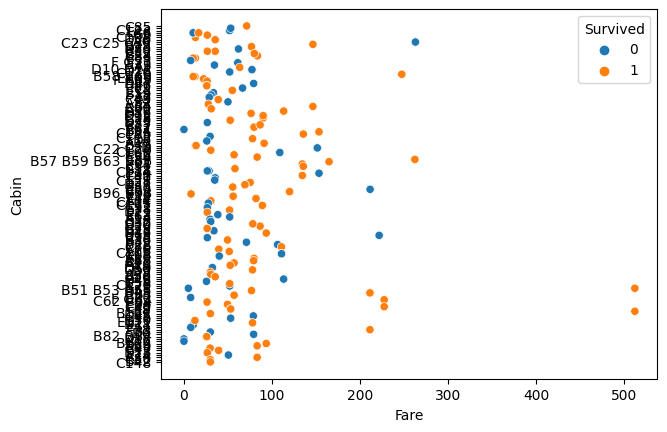

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

temp_df.drop(columns='Name')

for i in range(len(temp_df.columns) - 1):
  for j in range(i+1, len(temp_df.columns) - 1 ):
    x_label = temp_df.columns[i]
    y_label = temp_df.columns[j]
    sns.scatterplot(x=x_label, y=y_label, data=temp_df, hue='Survived')
    plt.show()

# Data Preprocessing

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [42]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [43]:
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()),    
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [45]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [46]:
X_train = preprocess_pipeline.fit_transform(train_set)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
y_train = train_set["Survived"]
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

# Train and Calculating Performance

In [48]:
from sklearn.neighbors import KNeighborsClassifier

titatic_clf = KNeighborsClassifier()

titatic_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [76]:
from sklearn.model_selection import cross_val_score
KNN = cross_val_score(titatic_clf, X_train, y_train, cv=10, scoring="accuracy")
RForest = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="accuracy")
SGD = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring="accuracy")



print("KNN: ", KNN.mean())
print("RandomForest: ",RForest.mean())
print("SGDClassifier: ", SGD.mean())

KNN:  0.8069912609238452
RandomForest:  0.8137578027465668
SGDClassifier:  0.7823220973782771


In [77]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=10)

In [78]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)

print(precision,recall)

0.7716049382716049 0.7309941520467836


In [80]:
# Combine precision and recall into a singe metric called the F1 score.
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.7507507507507507

# Predictions

In [91]:
X_test = preprocess_pipeline.transform(test_set)
y_pred = forest_clf.predict(X_test)


print(y_pred)

[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 1 0 0 1 0 0 1]
